In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [16]:
# Membaca file CSV
df = pd.read_csv(next(iter(uploaded)))

# Menampilkan beberapa baris pertama
df.head()

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
1;0;3;Braund,Mr. Owen Harris;male;22;1;0;A/5 21171;7.25;;S
2;1;1;Cumings,Mrs. John Bradley (Florence Briggs Thayer);fe...
3;1;3;Heikkinen,Miss. Laina;female;26;0;0;STON/O2. 3101282;7....
4;1;1;Futrelle,Mrs. Jacques Heath (Lily May Peel);female;35;...
5;0;3;Allen,Mr. William Henry;male;35;0;0;373450;8.05;;S


In [35]:
df = pd.read_csv(filename, delimiter=';')

In [36]:
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

In [37]:
# Bersihkan spasi di nama kolom
df.columns = df.columns.str.strip()

# Tampilkan beberapa baris awal
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


# Eksplorasi Awal

1. Hitung jumlah total penumpang

In [38]:
# Jumlah total penumpang
total_penumpang = df.shape[0]
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


2. Hitung jumlah selamat & tidak selamat (tabel + grafik)

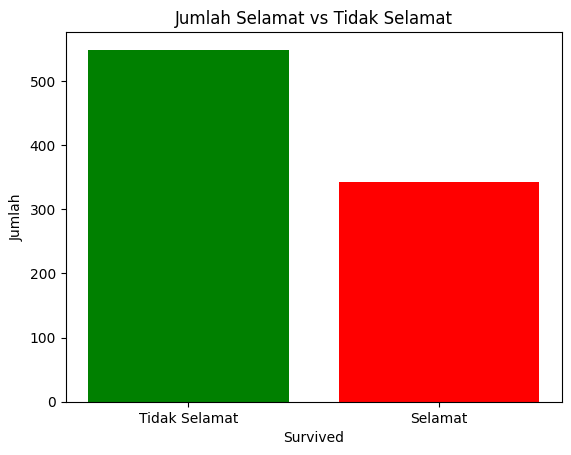


Jumlah selamat dan tidak selamat:
Survived
0    549
1    342
Name: count, dtype: int64


In [77]:
# Jumlah selamat vs tidak selamat
survived_counts = df['Survived'].value_counts()
# Menampilkan grafik
plt.bar(survived_counts.index, survived_counts.values, color=['green', 'red'])
plt.xlabel('Survived')
plt.ylabel('Jumlah')
plt.title('Jumlah Selamat vs Tidak Selamat')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.show()

print("\nJumlah selamat dan tidak selamat:")
print(survived_counts)

3. Hitung rata-rata umur, cari penumpang termuda & tertua

In [41]:
# Rata-rata umur, termuda dan tertua
mean_age = df['Age'].mean()
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"\nRata-rata umur: {mean_age:.2f}")
print(f"Penumpang termuda: {min_age} tahun")
print(f"Penumpang tertua: {max_age} tahun")


Rata-rata umur: 29.70
Penumpang termuda: 0.42 tahun
Penumpang tertua: 80.0 tahun


4. Hitung penumpang berdasarkan jenis kelamin (visualisasi)

In [24]:
# Penumpang berdasarkan jenis kelamin
sex_counts = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(sex_counts)


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


Berikut Visualisasinya

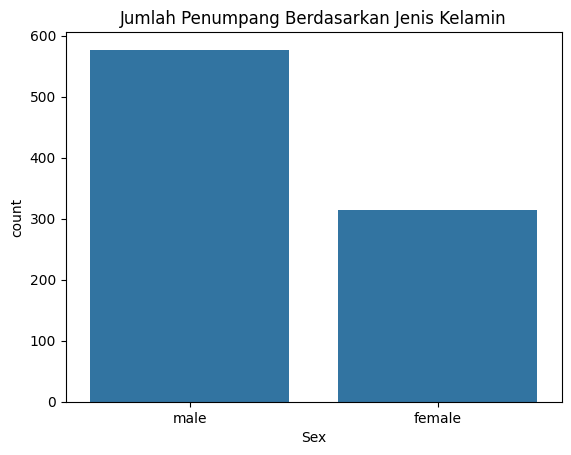

In [25]:
# Visualisasi jenis kelamin
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.show()

5. Hitung penumpang berdasarkan kelas (Pclass) + persentase (visualisasi)

In [26]:
# Penumpang berdasarkan kelas
pclass_counts = df['Pclass'].value_counts()
pclass_percent = df['Pclass'].value_counts(normalize=True) * 100

print("\nJumlah penumpang berdasarkan kelas:")
print(pclass_counts)
print("\nPersentase penumpang berdasarkan kelas:")
print(pclass_percent)


Jumlah penumpang berdasarkan kelas:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Persentase penumpang berdasarkan kelas:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


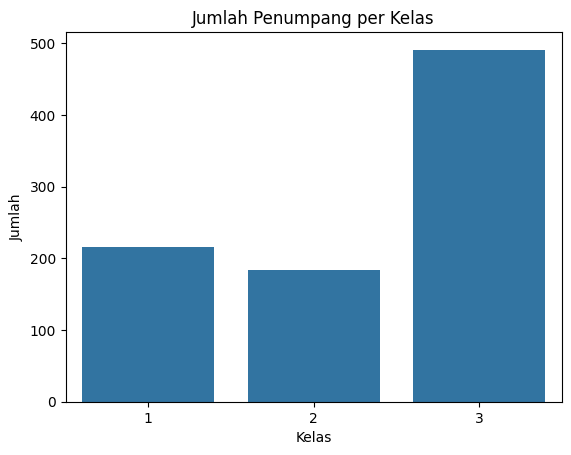

In [27]:
# Visualisasi kelas
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

# Preprocessing

1. Cek dan tangani missing values

In [28]:
# Cek missing values
print("\nCek Missing Values:")
print(df.isnull().sum())


Cek Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
# Tangani missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-29-1e883781ff57>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [31]:
# Untuk Cabin dan Embarked, bisa drop kalau banyak kosong
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-31-2708f414bd3d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [32]:
# Cek ulang
print("\nMissing Values Setelah Penanganan:")
print(df.isnull().sum())


Missing Values Setelah Penanganan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


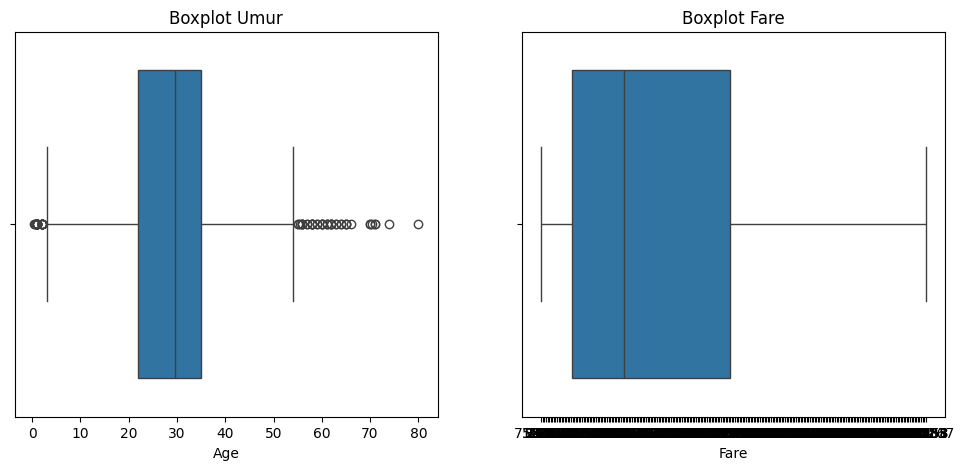

In [33]:
# Cek outlier (menggunakan boxplot untuk Age dan Fare)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot Umur')

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot Fare')

plt.show()

In [42]:
# Optional: Tangani outlier Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

fare_upper = Q3 + 1.5*IQR
fare_lower = Q1 - 1.5*IQR

In [44]:
import numpy as np
# Clipping
df['Fare'] = np.where(df['Fare'] > fare_upper, fare_upper, df['Fare'])
df['Fare'] = np.where(df['Fare'] < fare_lower, fare_lower, df['Fare'])

# Modelling (Naive Bayes)

1. Proses split data train/test

In [45]:
# Encode data kategorikal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

Proses train/test membagi data menjadi dua bagian: data pelatihan (train) untuk melatih model, dan data pengujian (test) untuk mengevaluasi kinerjanya. Pada kode di atas, LabelEncoder digunakan untuk mengubah data kategorikal ('Sex' dan 'Embarked') menjadi format numerik agar bisa diproses oleh model.

In [46]:
# Fitur dan Target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [55]:
# Hapus baris yang mengandung NaN
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

# Handle missing values BEFORE splitting
imputer = SimpleImputer(strategy='mean')
feature_columns = X.columns
X = pd.DataFrame(imputer.fit_transform(X), columns=feature_columns)

# Now, split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Buat 3 model klasifikasi berbeda (Menggunakan Model Naive Bayes, Decision Tree dan Logistic Regression)

In [68]:
# 3 Model Klasifikasi:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [69]:
# Model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [70]:
# Model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Model Logistic Regression
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [72]:
# Prediksi
y_pred_nb = model_nb.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

3. Hitung nilai evaluasi model pada data uji

In [73]:
# Evaluasi
from sklearn.metrics import accuracy_score, classification_report

print("\nAkurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("\nAkurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("\nAkurasi Logistic Regression:", accuracy_score(y_test, y_pred_lr))


Akurasi Naive Bayes: 0.8044692737430168

Akurasi Decision Tree: 0.770949720670391

Akurasi Logistic Regression: 0.8044692737430168


# Evaluasi Akhir

In [74]:
# Classification Report untuk model terbaik
print("\nClassification Report Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       105
           1       0.72      0.85      0.78        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.80      0.81       179



1. Prediksi "selamat"

In [75]:
# Precision & Recall untuk kelas 'Selamat' (label 1)
from sklearn.metrics import precision_score, recall_score

precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print(f"\nPrecision (selamat): {precision_nb:.2f}")
print(f"Recall (selamat): {recall_nb:.2f}")


Precision (selamat): 0.72
Recall (selamat): 0.85


Berdasarkan hasil diatas, classification report terbaik, ambil precision & recall untuk prediksi "selamat" adalah Model Naive Bayes

2. Berikut jumlah penumpang yang diprediksi selamat, dan berapa yang benar-benar selamat

In [76]:
# Hitung jumlah prediksi selamat
predicted_selamat = sum(y_pred_nb)
benar_selamat = sum((y_pred_nb == 1) & (y_test == 1))

print(f"\nJumlah penumpang yang diprediksi selamat: {predicted_selamat}")
print(f"Jumlah yang benar-benar selamat dari prediksi: {benar_selamat}")


Jumlah penumpang yang diprediksi selamat: 87
Jumlah yang benar-benar selamat dari prediksi: 63
